In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
df1=pd.read_csv('SMS_train (1) (1).csv',encoding='ISO-8859-1')
df2=pd.read_csv('SMS_train (1) (1).csv',encoding='ISO-8859-1')


In [3]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)

In [4]:
df.shape

(1914, 3)

In [5]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [6]:
df.head()


,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [7]:
df.tail()

,S. No.,Message_body,Label
1909,953,hows my favourite person today? r u workin har...,Non-Spam
1910,954,How much you got for cleaning,Non-Spam
1911,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
1912,956,Wat time ü finish?,Non-Spam
1913,957,Just glad to be talking to you.,Non-Spam


In [8]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [9]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [10]:
df.drop(['S. No.'],inplace=True,axis=1)

In [11]:
x=df['Label'].value_counts()
x

Label
Non-Spam    1670
Spam         244
Name: count, dtype: int64

Text(0.5, 1.0, 'Label')

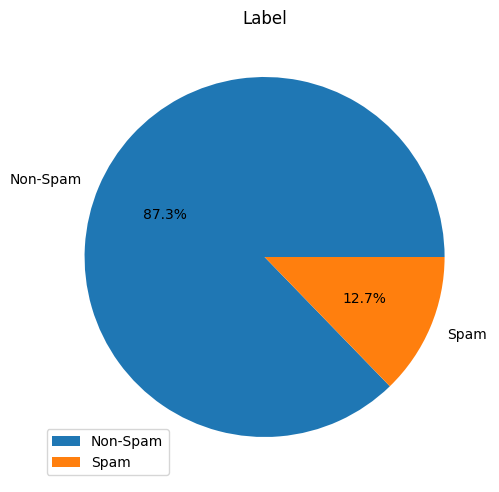

In [12]:
plt.pie(x,labels=x.index,autopct='%.1f%%') #autopct using for wright percentage in graph
plt.legend(loc='lower left')  #loc=upper left,lower left,upper right,lower right
plt.tight_layout() #using for avoid legend overlapping
plt.title('Label')


In [13]:
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})

In [14]:
df.dtypes

Message_body    object
Label            int64
dtype: object

In [15]:
sms=df.Message_body

In [16]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
sms=sms.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
sms



0                             Rofl . Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity , * was in mood for that . So ... any oth...
3                   Will ü b going to esplanade fr home ?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1909    hows my favourite person today ? r u workin ha...
1910                        How much you got for cleaning
1911    Sorry da . I gone mad so many pending works wh...
1912                                  Wat time ü finish ?
1913                     Just glad to be talking to you .
Name: Message_body, Length: 1914, dtype: object

In [17]:
sms=sms.str.replace('[^a-zA-Z0-9]'," ",regex=True)
sms

0                             Rofl   Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity     was in mood for that   So     any oth...
3                   Will   b going to esplanade fr home  
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1909    hows my favourite person today   r u workin ha...
1910                        How much you got for cleaning
1911    Sorry da   I gone mad so many pending works wh...
1912                                  Wat time   finish  
1913                     Just glad to be talking to you  
Name: Message_body, Length: 1914, dtype: object

In [18]:
sms=sms.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
sms

0                                  Rofl Its true its name
1       The guy did some bitching but acted like inter...
2            Pity was mood for that any other suggestions
3                               Will going esplanade home
4       This the 2nd time have tried contact have won ...
                              ...                        
1909    hows favourite person today workin hard couldn...
1910                        How much you got for cleaning
1911               Sorry gone mad many pending works what
1912                                      Wat time finish
1913                                Just glad talking you
Name: Message_body, Length: 1914, dtype: object

In [19]:
from nltk.stem import SnowballStemmer
sp=SnowballStemmer('english')
sms=sms.apply(lambda x:[sp.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
sms

0                                    rofl it true it name
1       the guy did some bitch but act like interest b...
2                piti was mood for that ani other suggest
3                                   will go esplanad home
4       this the 2nd time have tri contact have won th...
                              ...                        
1909    how favourit person today workin hard couldn s...
1910                           how much you got for clean
1911                   sorri gone mad mani pend work what
1912                                      wat time finish
1913                                   just glad talk you
Name: Message_body, Length: 1914, dtype: object

In [20]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
sms=sms.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop ]).apply(lambda x:' '.join(x))
sms

0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                        go esplanad home
4       2nd time tri contact 750 pound prize claim eas...
                              ...                        
1909    favourit person today workin hard sleep last n...
1910                                       much got clean
1911                        sorri gone mad mani pend work
1912                                      wat time finish
1913                                            glad talk
Name: Message_body, Length: 1914, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data=tf.fit_transform(sms)
data

<1914x2535 sparse matrix of type '<class 'numpy.float64'>'
	with 14716 stored elements in Compressed Sparse Row format>

In [22]:
print(data)

  (0, 1524)	0.5169435228110243
  (0, 2305)	0.5282466923116645
  (0, 1886)	0.6735909933227386
  (1, 959)	0.21128145741770968
  (1, 1000)	0.3227948282733482
  (1, 2429)	0.22911557563986584
  (1, 1550)	0.26703814284552896
  (1, 818)	0.2968694459464132
  (1, 2055)	0.2797928331631829
  (1, 495)	0.27094406361947804
  (1, 1201)	0.3227948282733482
  (1, 1328)	0.2151873781916588
  (1, 248)	0.35262613137423243
  (1, 430)	0.3785515137011675
  (1, 1064)	0.26341146306336427
  (2, 2146)	0.511430427515646
  (2, 304)	0.36819602225025855
  (2, 1485)	0.5490312409190622
  (2, 1692)	0.5490312409190622
  (3, 1129)	0.46919321748886317
  (3, 843)	0.7331380374864307
  (3, 1021)	0.492307162910508
  (4, 1810)	0.24416744435796325
  (4, 1529)	0.2876035318526271
  (4, 1455)	0.25445037594403663
  :	:
  (1908, 2212)	0.1764370113030202
  (1909, 1807)	0.3779820398252466
  (1909, 898)	0.3779820398252466
  (1909, 2478)	0.35209565834079687
  (1909, 1533)	0.35209565834079687
  (1909, 1086)	0.33504473475577945
  (1909, 155

In [23]:
y=df.Label.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

In [25]:
#balNCED
from imblearn.over_sampling import SMOTE
from collections import Counter
st=SMOTE(random_state=42)
x_res,y_res=st.fit_resample(x_train,y_train)
print("Class distribution after oversampling:", Counter(y_res))
print("Class distribution before oversampling:", Counter(y_res))

Class distribution after oversampling: Counter({0: 1161, 1: 1161})
Class distribution before oversampling: Counter({0: 1161, 1: 1161})


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier()
sv=SVC()
mn=BernoulliNB()
lst=[knn,sv,mn]
for i in lst:
    print('model is',i)
    i.fit(x_res,y_res)
    y_pred=i.predict(x_test)
    print('accuracy score is')
    print(accuracy_score(y_test,y_pred))
    print('classification report is')
    print(classification_report(y_test,y_pred))
    print('*'*100)

model is KNeighborsClassifier()
accuracy score is
0.9791304347826087
classification report is
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       509
           1       1.00      0.82      0.90        66

    accuracy                           0.98       575
   macro avg       0.99      0.91      0.94       575
weighted avg       0.98      0.98      0.98       575

****************************************************************************************************
model is SVC()
accuracy score is
0.9860869565217392
classification report is
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       509
           1       1.00      0.88      0.94        66

    accuracy                           0.99       575
   macro avg       0.99      0.94      0.96       575
weighted avg       0.99      0.99      0.99       575

**************************************************************************